# IE598 HW5 Report
## Bangguo Wang

In [28]:
import h5py
import numpy as np
import pickle
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Part 1: Fine-tuning Resnet for Action Recognition

In [29]:
file_dir = 'part1/'
with open(file_dir+'class_list.pkl','rb') as f:
    class_list = pickle.load(f)
class_list = [i.decode().lower() for i in class_list]

In [36]:
def get_labels(prediction):
    mean_prediction = np.mean(prediction,axis = 0)
    label_top1 = np.argsort(mean_prediction)[-1]
    label_top5 = np.argsort(mean_prediction)[-5:]
    label_top10 = np.argsort(mean_prediction)[-10:]
    return label_top1,label_top5,label_top10,mean_prediction

In [37]:
# get the names of the files
import os 
def getfile(rootDir): 
    for lists in os.listdir(rootDir): 
        path = os.path.join(rootDir, lists) 
        if 'hdf5' in path:
            filenames.append(path)
        if os.path.isdir(path): 
            getfile(path) 
filenames = []
rootDir  = 'part1/UCF-101-predictions/'
getfile(rootDir)
#filenames

In [86]:
videos1= {}
for filename in filenames:
    with h5py.File(filename,'r') as h:
        prediction = h['predictions'][:]
    label_top1,label_top5,label_top10,mean_prediction1 = get_labels(prediction)
    true_name = re.search('v_(\w+)_\w+_\w+.hdf5', filename).group(1)
    true_label = class_list.index(true_name.lower())
    key = filename.split('/')[-1]
    videos1[key] = [mean_prediction1,label_top1,label_top5,label_top10,true_label,true_name]

### Accuracy for the model 1

In [54]:
# for the top one
total = len(videos1)
count = 0
for i in videos1:
    if(videos1[i][1] == videos1[i][4]):
        count += 1
accuracy1_top1 = count*1.0/total
accuracy1_top1

0.796333

In [55]:
# for the top five
total = len(videos1)
count = 0
for i in videos1:
    if(any(videos1[i][2] == videos1[i][4])):
        count += 1
accuracy1_top5 = count*1.0/total
accuracy1_top5

0.940259

In [56]:
# for the top ten
total = len(videos1)
count = 0
for i in videos1:
    if(any(videos1[i][3] == videos1[i][4])):
        count += 1
accuracy1_top10 = count*1.0/total
accuracy1_top10

0.968279

### Confusion matrix for the model 1

In [68]:
con_mat = np.zeros([101,101])
for key in videos1:
    con_mat[videos1[key][4]][videos1[key][1]] += 1

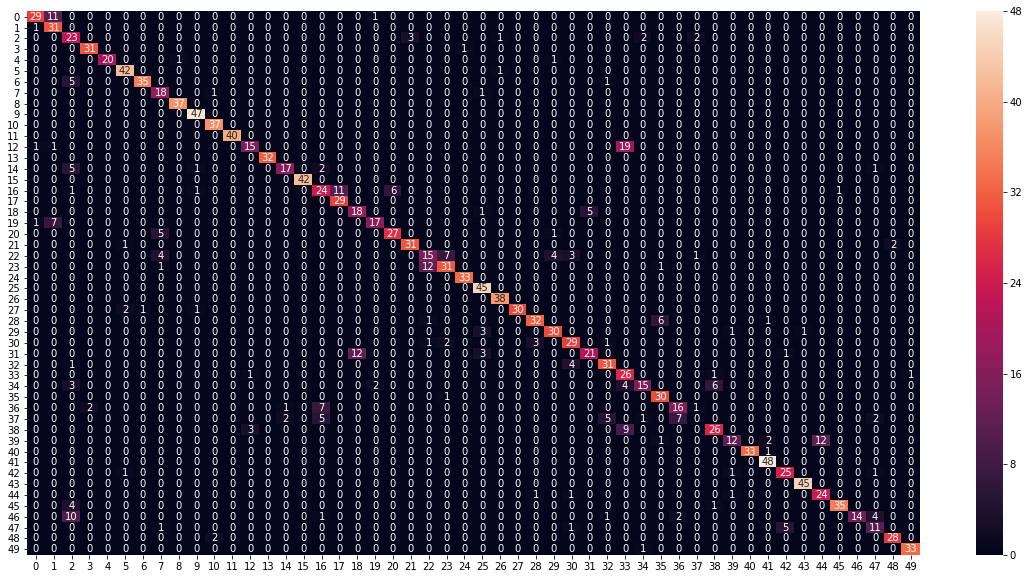

In [69]:
# to show it clear, I use two seperate confusion matrixs 
# the first 50 classes
array = con_mat[0:50,0:50]
import pandas as pd
import matplotlib.pyplot as plt
length = len(array)
df_cm = pd.DataFrame(array, index = [i for i in range(length)],
                  columns = [i for i in range(length)])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
plt.show()

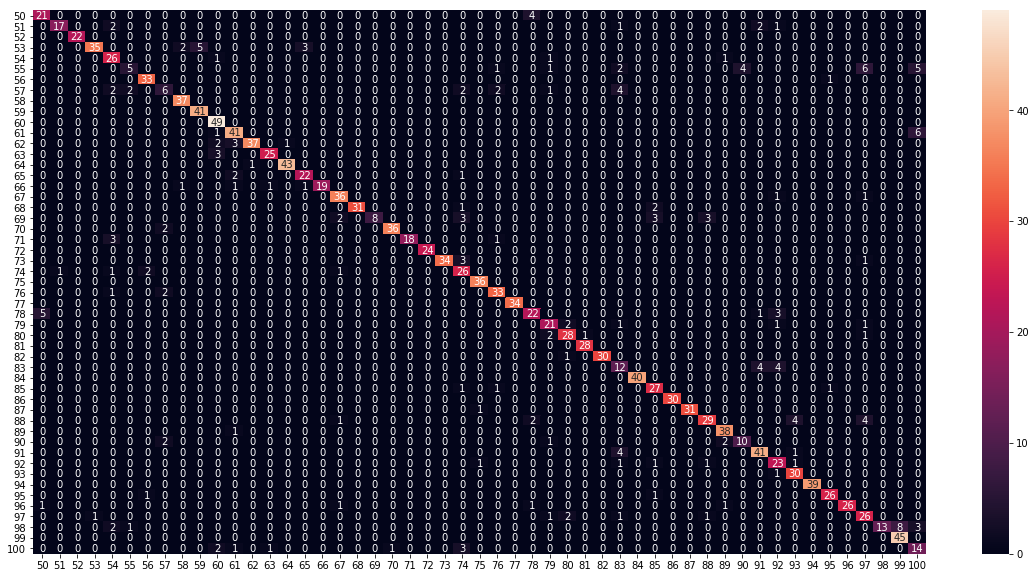

In [70]:
# the second confusion matrix
array = con_mat[50:101,50:101]
import pandas as pd
import matplotlib.pyplot as plt
length = len(array)
df_cm = pd.DataFrame(array, index = [i for i in range(50,length+50)],
                  columns = [i for i in range(50,length+50)])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
plt.show()

## Part 2: Extracted Features from ConvLSTM

In [59]:
# get the names of the files
import os 
def getfile(rootDir): 
    for lists in os.listdir(rootDir): 
        path = os.path.join(rootDir, lists) 
        if 'hdf5' in path:
            filenames2.append(path)
        if os.path.isdir(path): 
            getfile(path) 
filenames2 = []
rootDir  = 'part2/'
getfile(rootDir)

In [87]:
videos2= {}
for filename in filenames2:
    with h5py.File(filename,'r') as h:
        mean_prediction2 = h['predictions'][:]
    label_top1,label_top5,label_top10 = np.argsort(mean_prediction2)[-1],np.argsort(mean_prediction2)[-5:],np.argsort(mean_prediction2)[-10:]
    true_name = re.search('v_(\w+)_\w+_\w+.hdf5', filename).group(1)
    true_label = class_list.index(true_name.lower())
    key = filename.split('/')[-1]
    videos2[key] = [mean_prediction2,label_top1,label_top5,label_top10,true_label,true_name]

### Accuracy for the model 2

In [77]:
# for the top one
total = len(videos2)
count = 0
for i in videos2:
    if(videos2[i][1] == videos2[i][4]):
        count += 1
accuracy2_top1 = count*1.0/total
accuracy2_top1

0.821692

In [64]:
# for the top five
total = len(videos2)
count = 0
for i in videos2:
    if(any(videos2[i][2] == videos2[i][4])):
        count += 1
accuracy2_top5 = count*1.0/total
accuracy2_top5

0.936277

In [66]:
# for the top ten
total = len(videos2)
count = 0
for i in videos2:
    if(any(videos2[i][3] == videos2[i][4])):
        count += 1
accuracy2_top10 = count*1.0/total
accuracy2_top10

0.968535

### Confusion matrix for the model 2

In [74]:
con_mat = np.zeros([101,101])
for key in videos2:
    con_mat[videos2[key][4]][videos2[key][1]] += 1

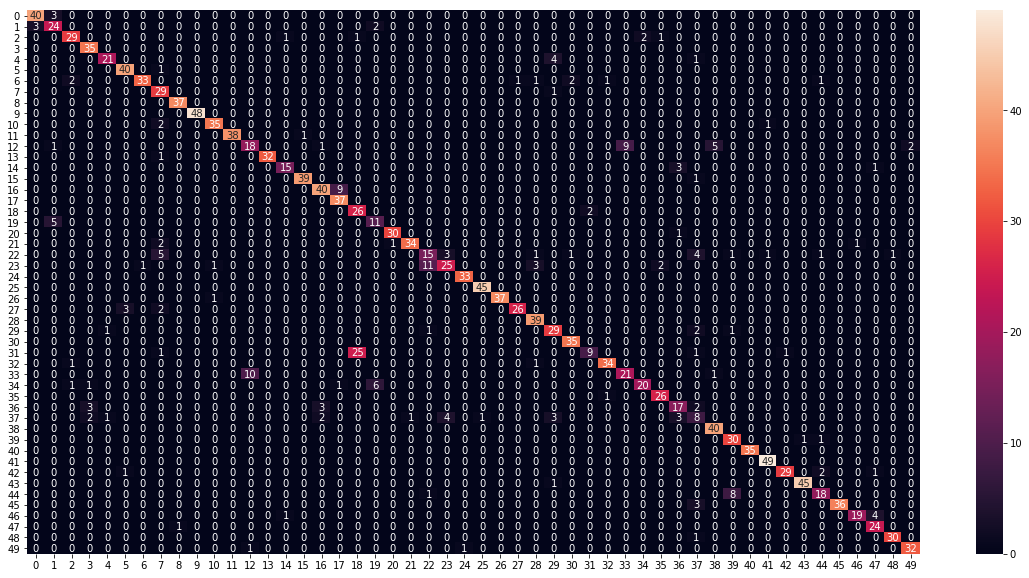

In [75]:
# to show it clear, I use two seperate confusion matrixs 
# the first 50 classes
array = con_mat[0:50,0:50]
import pandas as pd
import matplotlib.pyplot as plt
length = len(array)
df_cm = pd.DataFrame(array, index = [i for i in range(length)],
                  columns = [i for i in range(length)])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
plt.show()

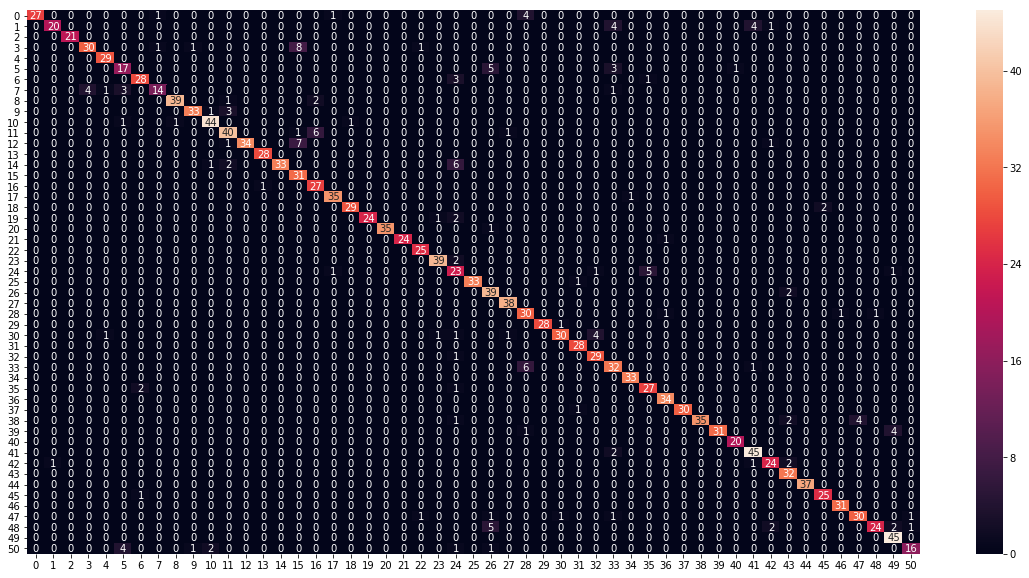

In [76]:
# the second one confusion matrix
array = con_mat[50:101,50:101]
import pandas as pd
import matplotlib.pyplot as plt
length = len(array)
df_cm = pd.DataFrame(array, index = [i for i in range(length)],
                  columns = [i for i in range(length)])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
plt.show()

## Part 3: Ensemble: Combine the results of two models

### Accuracy for the ensemble method

In [89]:
ensemble_method = {}
count = 0
total = len(videos2)
for key in videos2:
    ensemble_prediction = videos1[key][0] + videos2[key][0] 
    ensemble_label = np.argsort(ensemble_prediction)[-1]
    if ensemble_label == videos2[key][4]:
        count += 1
    ensemble_method[key] = [videos2[key][4],ensemble_label,videos2[key][5]]
accuracy = 1.0*count/total
accuracy

0.874743

### Confusion matrix for the ensemble method

In [93]:
con_mat = np.zeros([101,101])
for key in ensemble_method:
    row = ensemble_method[key][0]
    col = ensemble_method[key][1]
    con_mat[row,col] += 1

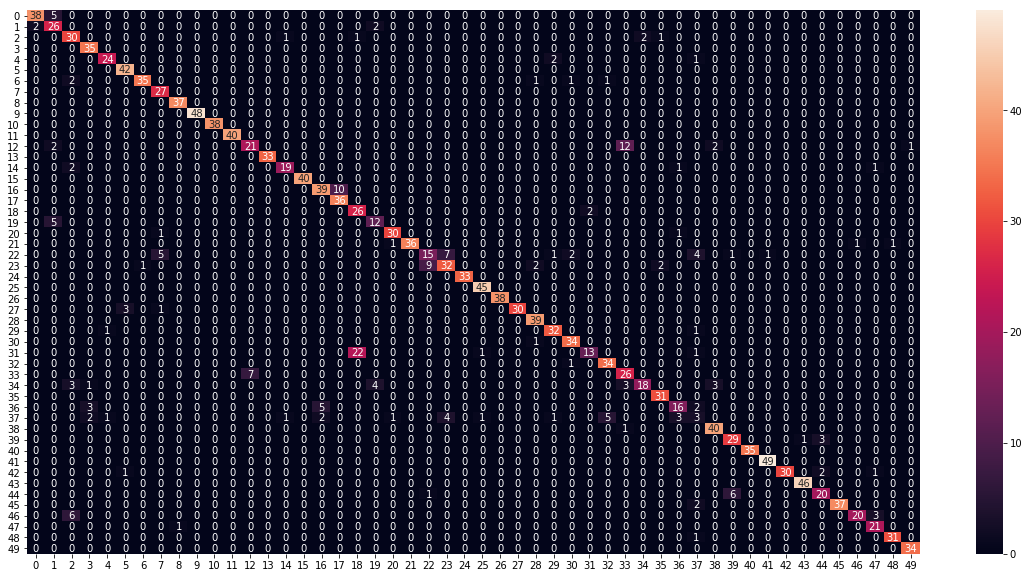

In [94]:
# to show it clear, I use two seperate confusion matrixs 
# the first 50 classes
array = con_mat[0:50,0:50]
import pandas as pd
import matplotlib.pyplot as plt
length = len(array)
df_cm = pd.DataFrame(array, index = [i for i in range(length)],
                  columns = [i for i in range(length)])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
plt.show()

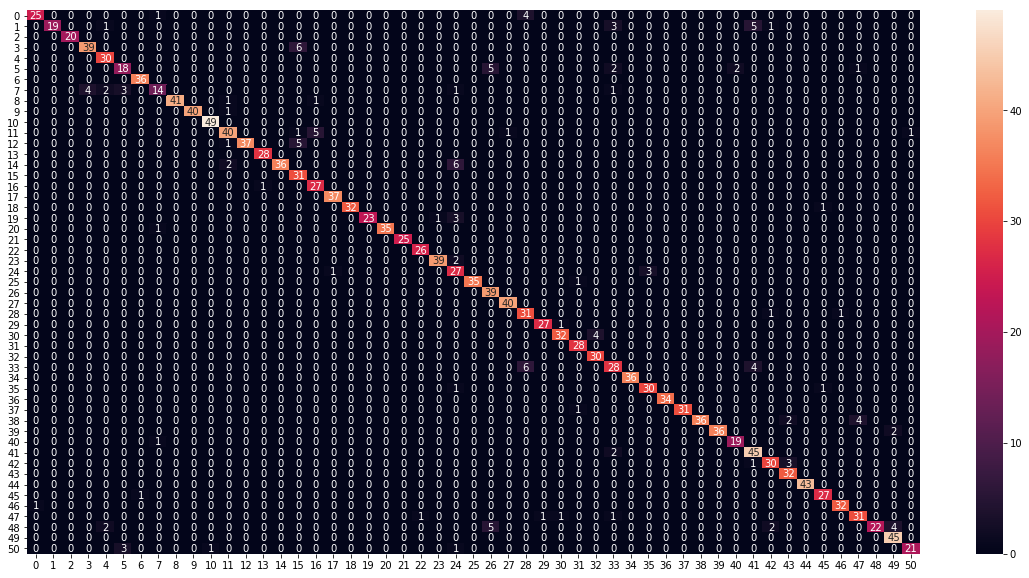

In [95]:
# the second one confusion matrix
array = con_mat[50:101,50:101]
import pandas as pd
import matplotlib.pyplot as plt
length = len(array)
df_cm = pd.DataFrame(array, index = [i for i in range(length)],
                  columns = [i for i in range(length)])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)
plt.show()

## Calculate the difference in performance for each class between the part 1 model and the combined output model

In [103]:
# calculate the medel1's accuracy for each class
class_accuracy_model1 = {}
for key in videos1:
    name = videos1[key][5]
    true_label = videos1[key][4]
    pred_label = videos1[key][1]
    if name not in class_accuracy_model1:
        class_accuracy_model1[name] = []
    class_accuracy_model1[name].append(true_label == pred_label)
for key in class_accuracy_model1:
    class_accuracy_model1[key] = np.mean(class_accuracy_model1[key])

In [101]:
# calculate the combined model's accuracy for each class 
class_accuracy_ensemble = {}
for key in ensemble_method:
    name = ensemble_method[key][2]
    true_label = ensemble_method[key][0]
    pred_label = ensemble_method[key][1]
    if name not in class_accuracy_ensemble:
        class_accuracy_ensemble[name] = []
    class_accuracy_ensemble[name].append(true_label == pred_label)
for key in class_accuracy_ensemble:
    class_accuracy_ensemble[key] = np.mean(class_accuracy_ensemble[key])

In [104]:
# calculate the improvement for each class
improvement = {}
for key in class_accuracy_model1:
    improvement[key] = class_accuracy_ensemble[key] - class_accuracy_model1[key]

In [110]:
def dict2list(dic):
    keys = dic.keys()
    vals = dic.values()
    lst = [(key, val) for key, val in zip(keys, vals)]
    return lst
sorted_improvement = sorted(dict2list(improvement), key=lambda x:x[1], reverse=True) 

In [112]:
# the 10 classes with the largest improvement 
sorted_improvement[0:10]

[('PullUps', 0.5357142857142857),
 ('HighJump', 0.45945945945945943),
 ('SoccerJuggling', 0.41025641025641024),
 ('Nunchucks', 0.37142857142857139),
 ('HeadMassage', 0.34146341463414631),
 ('TaiChi', 0.32142857142857145),
 ('BoxingPunchingBag', 0.30612244897959184),
 ('PlayingTabla', 0.29032258064516125),
 ('BreastStroke', 0.2857142857142857),
 ('PlayingViolin', 0.2857142857142857)]

In [114]:
# the 10 classes with worse performance
sorted_improvement[-10:][::-1]

[('FrontCrawl', -0.21621621621621617),
 ('PlayingSitar', -0.15909090909090906),
 ('ApplyLipstick', -0.15625),
 ('BrushingTeeth', -0.1388888888888889),
 ('JavelinThrow', -0.12903225806451613),
 ('SoccerPenalty', -0.097560975609756073),
 ('MilitaryParade', -0.060606060606060552),
 ('TableTennisShot', -0.051282051282051211),
 ('Bowling', -0.046511627906976716),
 ('Rowing', -0.02777777777777779)]

From the result, I think that, the classes such as 'PullUps','HighJump', are difficult to be classified by single frame and series frames of them can help to classify them. Therefore, the performance of prediction for these classes is improved a lot. While those classes, such as 'FrontCrawl' and 'PlayingSitar', it's better to classify them by single frame, while using series frames on the other hand may confuse the classifer to some extend, therefore, these classes have worst improvement.